In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from graph_trafic import Traffic

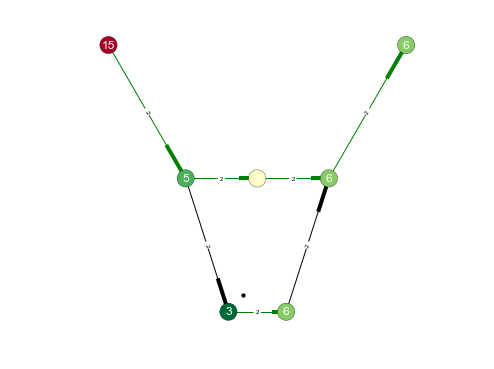

In [4]:
# Let's define a simple network
edge_list = [(0, 1, {'w': 2}),
             (1, 2, {'w': 2}),
             (2, 3, {'w': 2}),
             (3, 6, {'w': 2}),
             (1, 4, {'w': 2}),
             (4, 5, {'w': 2}),
             (5, 3, {'w': 2})]

G = Traffic(edge_list=edge_list, layout='spectral')
plt.figure(figsize=(8,6))
G.plot_graph()
plt.show()

# Q-learning

* possible actions: 4 vectors
* states: position of car_1 and sorted list of nodes per number of cars.

** Bellman equation: **
```
Q(s,a) = r + gamma * max( Q(s',a'))
``` 

** Q_table :**
Start with random Q table [states, actions]. The states are the set of all random distributions of 50 cars in the network.

** iteration : **
* from state s select the most probable action a from the Q_table.
* get the reward r and observe the new state s'
* update Q_table: ```Q[s,a] = Q[s,a] + alpha( r + gamma* max( Q[s',a']) - Q[s,a])``` Given a learning rate alpha, we can control how much chnage we applay to the current Q value (1: change, 0: no-change).
* current state is s'

In [39]:
def sorted_node_list(G):
    nb_car_per_node = [len(x[1]['tags']) for x in G.G.nodes(data=True)]
    sorted_node_per_nb_cars = np.argsort(nb_car_per_node)
    return sorted_node_per_nb_cars[::-1]

In [40]:
sorted_node_list(G)

array([0, 2, 6, 5, 3, 1, 4], dtype=int64)

The states space is the all the permutations of nodes, and all possible positions of car_1.

## Create q_table

In [100]:
from itertools import permutations, product

In [102]:
def create_q_table(G):
    nb_gates = len(G.gates)
    actions = list(product([0,1],repeat=nb_gates)) 
    len_a = len(actions)
    
    nb_nodes = len(G.G.nodes)
    states = np.array(list(permutations(range(nb_nodes))))
    
    len_s = len(list(permutations(range(nb_nodes))))
    pos_car = len(list(range(nb_nodes)))

    q_table = np.random.rand(pos_car, len_s,len_a)
    return q_table, states, actions

In [103]:
q_table, states, actions = create_q_table(G)

In [107]:
np.shape(q_table)

(7L, 5040L, 4L)

In [108]:
np.shape(states)

(5040L, 7L)

In [109]:
np.shape(actions)

(4L, 2L)

In [110]:
actions

[(0, 0), (0, 1), (1, 0), (1, 1)]

## Find q_table indices

In [63]:
node_perm = np.array(list(permutations(range(7))))

In [75]:
np.where([all(x == sorted_node_list(G)) for x in node_perm])

(array([236], dtype=int64),)

In [76]:
node_perm[236,:]

array([0, 2, 6, 5, 3, 1, 4])

In [79]:
q_table[0, 236, :]

array([ 0.7536555 ,  0.71169014,  0.62839701,  0.74369631])

action space is the cartesian product of gates in two states (on, off)

In [82]:
nb_gates = len(G.gates)

In [86]:
nb_gates

2

In [97]:
from itertools import product

In [99]:
list(product([0,1],repeat=nb_gates))

[(0, 0), (0, 1), (1, 0), (1, 1)]

## Visualize q_table update

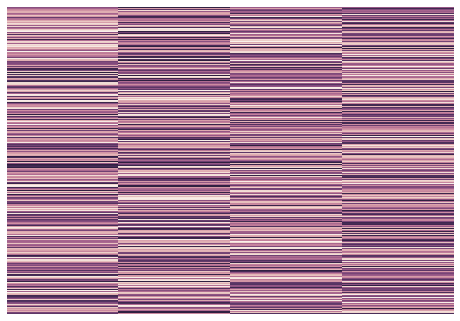

In [116]:
sns.heatmap(q_table[0, :, :], xticklabels=False, yticklabels=False, cbar=False)
plt.show()